# Graph von Erde um Sonne

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

G = 6.672 * 10 ** -11
earth = {
    'mass': 5.97219 * 10 ** 24,
    'pos': np.array((149_597_890_000, 0, 0), np.float64),
    'vel': np.array((0, -29_786, 0), np.float64)
}
sun = {
    'mass': 1.9889 * 10 ** 30,
    'pos': np.array((0, 0, 0), np.float64),
    'vel': np.array((0, 0, 0), np.float64)
}


def grav_force(o1, o2):
    delta = o2['pos'] - o1['pos']
    dist = np.linalg.norm(delta)
    return G * delta * (o1['mass'] * o2['mass'] / dist ** 3)


In [8]:
def simulate(time=1):
    # get force between sun and earth
    sun_accel = grav_force(sun, earth) / sun['mass']
    earth_accel = grav_force(earth, sun) / earth['mass']

    # update positions
    sun['pos'] = sun['pos'] + \
                 time * sun['vel'] + \
                 0.5 * (time ** 2) * sun_accel
    earth['pos'] = earth['pos'] + \
                   time * earth['vel'] + \
                   0.5 * (time ** 2) * earth_accel
    
    # update velocity
    sun['vel'] += sun_accel * time
    earth['vel'] += earth_accel * time


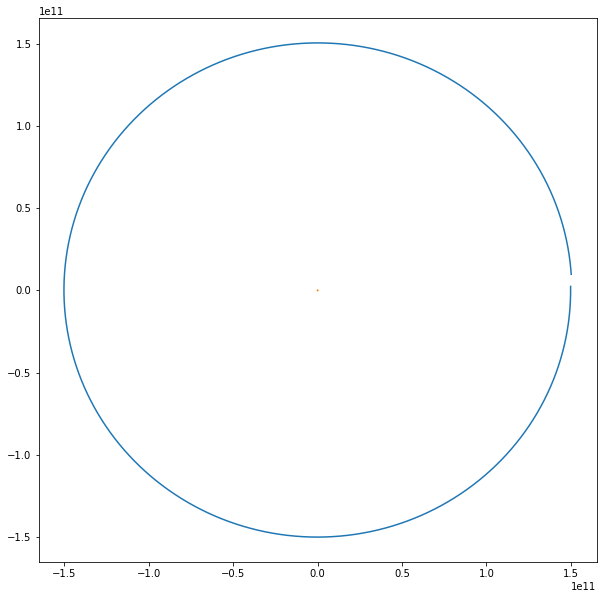

In [10]:
result_e = []
result_s = []
for _ in range(365 * 24):
    simulate(60 * 60)  # simulate in hour steps
    result_e.append(earth['pos'])
    result_s.append(sun['pos'])

plt.figure(figsize=(10, 10))
plt.plot([x[0] for x in result_e], [x[1] for x in result_e])
plt.plot([x[0] for x in result_s], [x[1] for x in result_s])
